In [1]:
!pip install -U scikit-learn

# INSTALLING IMPORTANT LIBRARIES FOR MODELLING

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  
import math
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

In [3]:
tscv = TimeSeriesSplit()

## READING THE DATA

In [4]:
df = pd.read_csv("F:/Technocolabs intern/Twitter_stock_final_dataset (1).csv")
df

,Year,Month,Day,StockName,Positive,Negative,Neutral,Total Tweets,Close,Volume,Open,High,Low,Day_of_week
0,2020,1,1,apple,10,2,8,20,75.0875,135647440.0,74.0600,75.1500,73.7975,Wednesday
1,2020,1,1,microsoft,9,0,11,20,160.6200,22634550.0,158.7800,160.7300,158.3300,Wednesday
2,2020,1,1,tesla,17,3,3,23,86.0520,47791930.0,84.9000,86.1391,84.3420,Wednesday
3,2020,1,1,nvidia,1,0,0,1,59.9775,23767876.0,59.6875,59.9775,59.1800,Wednesday
4,2020,1,1,paypal,1,0,1,2,110.7500,7419283.0,109.4700,111.2100,109.2750,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2978,2021,9,20,tesla,61,21,39,121,730.1700,24757650.0,734.5577,742.0000,718.6249,Monday
2979,2021,9,20,nvidia,3,4,3,10,211.1300,34944050.0,211.4600,214.3300,206.6200,Monday
2980,2021,9,20,paypal,1,1,2,4,269.9100,7728307.0,271.5500,273.0000,265.6800,Monday
2981,2021,9,21,nvidia,4,4,1,9,212.4600,20468810.0,214.1650,214.2500,209.5000,Tuesday


In [5]:
df = df.dropna()
df

,Year,Month,Day,StockName,Positive,Negative,Neutral,Total Tweets,Close,Volume,Open,High,Low,Day_of_week
0,2020,1,1,apple,10,2,8,20,75.0875,135647440.0,74.0600,75.1500,73.7975,Wednesday
1,2020,1,1,microsoft,9,0,11,20,160.6200,22634550.0,158.7800,160.7300,158.3300,Wednesday
2,2020,1,1,tesla,17,3,3,23,86.0520,47791930.0,84.9000,86.1391,84.3420,Wednesday
3,2020,1,1,nvidia,1,0,0,1,59.9775,23767876.0,59.6875,59.9775,59.1800,Wednesday
4,2020,1,1,paypal,1,0,1,2,110.7500,7419283.0,109.4700,111.2100,109.2750,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2978,2021,9,20,tesla,61,21,39,121,730.1700,24757650.0,734.5577,742.0000,718.6249,Monday
2979,2021,9,20,nvidia,3,4,3,10,211.1300,34944050.0,211.4600,214.3300,206.6200,Monday
2980,2021,9,20,paypal,1,1,2,4,269.9100,7728307.0,271.5500,273.0000,265.6800,Monday
2981,2021,9,21,nvidia,4,4,1,9,212.4600,20468810.0,214.1650,214.2500,209.5000,Tuesday


In [6]:
df = df.drop(['Day_of_week'],axis=1)

## LABEL ENCODING 

In [7]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [8]:
le.fit(df.StockName)

LabelEncoder()

In [9]:
print(le.classes_)

['apple' 'microsoft' 'nvidia' 'paypal' 'tesla']


In [10]:
le.transform(df.StockName)

array([0, 1, 4, ..., 3, 2, 3])

In [11]:
list(le.inverse_transform([0,1,2,3,4]))

['apple', 'microsoft', 'nvidia', 'paypal', 'tesla']

In [12]:
df.StockName = le.transform(df.StockName)

# DATA VISUALIZATION

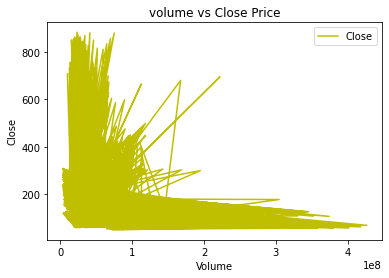

In [16]:
df.plot(x='Volume', y='Close', style='y')  
plt.title('volume vs Close Price')  
plt.xlabel('Volume')  
plt.ylabel('Close')  
plt.show()

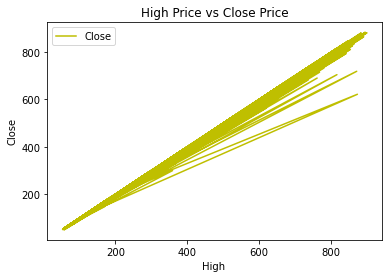

In [14]:
df.plot(x='High', y='Close', style='y')  
plt.title('High Price vs Close Price')  
plt.xlabel('High ')  
plt.ylabel('Close')  
plt.show()

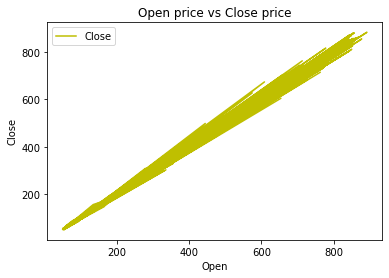

In [17]:
df.plot(x='Open',y='Close' , style='y')
plt.title('Open price vs Close price')
plt.xlabel('Open')
plt.ylabel('Close')
plt.show()

# NORMALIZE DATA

In [18]:
df2 = df.copy()

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()
df3 = pd.DataFrame(scaler.fit_transform(df2))
df3.columns = df2.columns
df3.index = df2.index
df3


,Year,Month,Day,StockName,Positive,Negative,Neutral,Total Tweets,Close,Volume,Open,High,Low
0,0.0,0.000000,0.000000,0.00,0.025641,0.012346,0.007266,0.016034,0.031160,0.312846,0.028568,0.026730,0.034640
1,0.0,0.000000,0.000000,0.25,0.023077,0.000000,0.009991,0.016034,0.133719,0.046200,0.129263,0.127660,0.136926
2,0.0,0.000000,0.000000,1.00,0.043590,0.018519,0.002725,0.018565,0.044307,0.105557,0.041452,0.039690,0.047399
3,0.0,0.000000,0.000000,0.50,0.002564,0.000000,0.000000,0.000000,0.013043,0.048874,0.011486,0.008836,0.016952
4,0.0,0.000000,0.000000,0.75,0.002564,0.000000,0.000908,0.000844,0.073922,0.010300,0.070655,0.069258,0.077568
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2978,1.0,0.727273,0.633333,1.00,0.156410,0.129630,0.035422,0.101266,0.816640,0.051209,0.813608,0.813189,0.814896
2979,1.0,0.727273,0.633333,0.50,0.007692,0.024691,0.002725,0.007595,0.194283,0.075243,0.191876,0.190874,0.195358
2980,1.0,0.727273,0.633333,0.75,0.002564,0.006173,0.001817,0.002532,0.264763,0.011029,0.263297,0.260067,0.266822
2981,1.0,0.727273,0.666667,0.50,0.010256,0.024691,0.000908,0.006751,0.195878,0.041090,0.195091,0.190780,0.198843


In [21]:
df4 = df.copy()
column = ['Volume','Open','High','Low','Positive','Negative','Neutral']
df4[column] = df4[column] /df4[column].abs().max()
df4

,Year,Month,Day,StockName,Positive,Negative,Neutral,Total Tweets,Close,Volume,Open,High,Low
0,2020,1,1,0,0.025641,0.012346,0.007266,20,75.0875,0.317761,0.083085,0.083463,0.084669
1,2020,1,1,1,0.023077,0.000000,0.009991,20,160.6200,0.053023,0.178128,0.178510,0.181654
2,2020,1,1,4,0.043590,0.018519,0.002725,23,86.0520,0.111955,0.095246,0.095668,0.096767
3,2020,1,1,2,0.002564,0.000000,0.000000,1,59.9775,0.055677,0.066961,0.066612,0.067898
4,2020,1,1,3,0.002564,0.000000,0.000908,2,110.7500,0.017380,0.122810,0.123512,0.125373
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2978,2021,9,20,4,0.156410,0.129630,0.035422,121,730.1700,0.057996,0.824068,0.824078,0.824489
2979,2021,9,20,2,0.007692,0.024691,0.002725,10,211.1300,0.081858,0.237228,0.238039,0.237058
2980,2021,9,20,3,0.002564,0.006173,0.001817,4,269.9100,0.018104,0.304640,0.303199,0.304819
2981,2021,9,21,2,0.010256,0.024691,0.000908,9,212.4600,0.047949,0.240262,0.237950,0.240363


In [22]:
df5 = df.copy()
df5


,Year,Month,Day,StockName,Positive,Negative,Neutral,Total Tweets,Close,Volume,Open,High,Low
0,2020,1,1,0,10,2,8,20,75.0875,135647440.0,74.0600,75.1500,73.7975
1,2020,1,1,1,9,0,11,20,160.6200,22634550.0,158.7800,160.7300,158.3300
2,2020,1,1,4,17,3,3,23,86.0520,47791930.0,84.9000,86.1391,84.3420
3,2020,1,1,2,1,0,0,1,59.9775,23767876.0,59.6875,59.9775,59.1800
4,2020,1,1,3,1,0,1,2,110.7500,7419283.0,109.4700,111.2100,109.2750
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2978,2021,9,20,4,61,21,39,121,730.1700,24757650.0,734.5577,742.0000,718.6249
2979,2021,9,20,2,3,4,3,10,211.1300,34944050.0,211.4600,214.3300,206.6200
2980,2021,9,20,3,1,1,2,4,269.9100,7728307.0,271.5500,273.0000,265.6800
2981,2021,9,21,2,4,4,1,9,212.4600,20468810.0,214.1650,214.2500,209.5000


# LINEAR REGRESSION MODEL

In [23]:
#samples = []
#rmse = []
#mae = []

x = df5[['Year','Month','Day','StockName','Positive','Negative','Neutral']].to_numpy()
y = np.array(df5['Close'])

for train_index, test_index in tscv.split(x):
    x_train , x_test = x[train_index] , x[test_index]
    y_train , y_test = y[train_index] , y[test_index]
    regresor = LinearRegression()
    regresor.fit(x_train,y_train)
    y_pred = regresor.predict(x_test)
    rmse = (math.sqrt(metrics.mean_squared_error(y_test,y_pred)))
    mae = (metrics.mean_absolute_error(y_test, y_pred))
    r2 = metrics.r2_score(y_test, y_pred)
    #accuracy = metrics.accuracy_score(y_test, y_pred,normalize=False)
    

#for i in range(len(samples)):
print(  "RMSE :" ,rmse , "mae :" , mae,"r^2 :",r2 )
#print(accuracy)

    

RMSE : 114.7064481528226 mae : 93.19761165360049 r^2 : 0.6453443889059983


In [24]:
d = pd.DataFrame({'Actual_Close_Price': y_test, 'Predicted_Close_Price': y_pred})
d.head(5)

,Actual_Close_Price,Predicted_Close_Price
0,178.897500,279.745936
1,273.190000,316.727626
2,129.436667,181.214170
3,259.223333,242.029385
4,615.090000,455.872516


<AxesSubplot:>

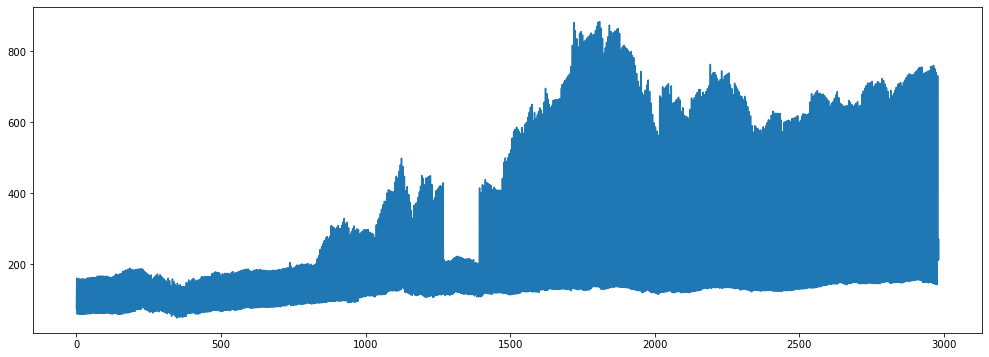

In [26]:
df['Close'].plot(figsize = (17,6))

In [27]:
df5

,Year,Month,Day,StockName,Positive,Negative,Neutral,Total Tweets,Close,Volume,Open,High,Low
0,2020,1,1,0,10,2,8,20,75.0875,135647440.0,74.0600,75.1500,73.7975
1,2020,1,1,1,9,0,11,20,160.6200,22634550.0,158.7800,160.7300,158.3300
2,2020,1,1,4,17,3,3,23,86.0520,47791930.0,84.9000,86.1391,84.3420
3,2020,1,1,2,1,0,0,1,59.9775,23767876.0,59.6875,59.9775,59.1800
4,2020,1,1,3,1,0,1,2,110.7500,7419283.0,109.4700,111.2100,109.2750
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2978,2021,9,20,4,61,21,39,121,730.1700,24757650.0,734.5577,742.0000,718.6249
2979,2021,9,20,2,3,4,3,10,211.1300,34944050.0,211.4600,214.3300,206.6200
2980,2021,9,20,3,1,1,2,4,269.9100,7728307.0,271.5500,273.0000,265.6800
2981,2021,9,21,2,4,4,1,9,212.4600,20468810.0,214.1650,214.2500,209.5000


# RANDOMFOREST REGRESSOR MODEL

In [28]:
#samples = []
#rmse = []
#mae = []

x = df5[['Year','Month','Day','StockName','Positive','Negative','Neutral']].to_numpy()
y = np.array(df5['Close'])

for train_index, test_index in tscv.split(x):
    x_train , x_test = x[train_index] , x[test_index]
    y_train , y_test = y[train_index] , y[test_index]
    regresor =RandomForestRegressor(n_estimators = 10, random_state = 0)
    regresor.fit(x_train,y_train)
    y_pred = regresor.predict(x_test)
    rmse = (math.sqrt(metrics.mean_squared_error(y_test,y_pred)))
    mae = (metrics.mean_absolute_error(y_test, y_pred))
    r2 = metrics.r2_score(y_test, y_pred)
    #accuracy = metrics.accuracy_score(y_test, y_pred,normalize=False)
    

#for i in range(len(samples)):
print(  "RMSE :" ,rmse , "mae :" , mae,"r^2 :",r2 )
#print(accuracy)

RMSE : 46.808885092122395 mae : 34.61385479344065 r^2 : 0.9409407720806471


In [29]:
d = pd.DataFrame({'Actual_Close_Price': y_test, 'Predicted_Close_Price': y_pred})
d.head(5)

,Actual_Close_Price,Predicted_Close_Price
0,178.897500,177.165417
1,273.190000,267.564000
2,129.436667,127.011000
3,259.223333,252.538333
4,615.090000,613.202333


# XG BOOSTING USING HYPERTUNING

In [30]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
xgb = XGBRegressor()

params = {'learning_rate':[0.01,0.03,0.05,0.1],
          'n_estimators':[5,10,15,20,50,70,100],
          'max_depth':[3,5,10]} 

cross_val = RandomizedSearchCV(xgb, param_distributions=params, n_iter=10,cv=5,n_jobs=-1, verbose=10)
cross_val.fit(x_train,y_train)

print('='*100)
print('The Best Parameters are : ',cross_val.best_params_)
print('='*100) 

xgb_best = cross_val.best_estimator_ 
xgb_best.fit(x_train, y_train)

y_pred = xgb_best.predict(x_test)

rmse = (math.sqrt(metrics.mean_squared_error(y_test,y_pred)))
mae = (metrics.mean_absolute_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)
    #accuracy = metrics.accuracy_score(y_test, y_pred,normalize=False)
    

#for i in range(len(samples)):
print(  "RMSE :" ,rmse , "mae :" , mae,"r^2 :",r2 )
#print(accuracy)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
The Best Parameters are :  {'n_estimators': 70, 'max_depth': 10, 'learning_rate': 0.03}
RMSE : 83.91586794892531 mae : 71.93783924801248 r^2 : 0.8101898848266124


In [31]:
d = pd.DataFrame({'Actual_Close_Price': y_test, 'Predicted_Close_Price': y_pred})
d.head(5)

,Actual_Close_Price,Predicted_Close_Price
0,178.897500,143.942276
1,273.190000,225.980087
2,129.436667,112.823387
3,259.223333,218.966476
4,615.090000,551.546936


# AdaBoost Regressor

In [35]:
#samples = []
#rmse = []
#mae = []

x = df5[['Year','Month','Day','StockName','Positive','Negative','Neutral']].to_numpy()
y = np.array(df5['Close'])

for train_index, test_index in tscv.split(x):
    x_train , x_test = x[train_index] , x[test_index]
    y_train , y_test = y[train_index] , y[test_index]
    regresor =AdaBoostRegressor(random_state=10, n_estimators=80)
    regresor.fit(x_train,y_train)
    y_pred = regresor.predict(x_test)
    rmse = (math.sqrt(metrics.mean_squared_error(y_test,y_pred)))
    mae = (metrics.mean_absolute_error(y_test, y_pred))
    r2 = metrics.r2_score(y_test, y_pred)
    #accuracy = metrics.accuracy_score(y_test, y_pred,normalize=False)
    

#for i in range(len(samples)):
print(  "RMSE :" ,rmse , "mae :" , mae,"r^2 :",r2 )
#print(accuracy)

RMSE : 57.174598330846976 mae : 49.04718688419817 r^2 : 0.9118875219431757


In [36]:
d = pd.DataFrame({'Actual_Close_Price': y_test, 'Predicted_Close_Price': y_pred})
d.head(5)

,Actual_Close_Price,Predicted_Close_Price
0,178.897500,195.220179
1,273.190000,231.590607
2,129.436667,180.862771
3,259.223333,197.755288
4,615.090000,656.104706


# CONCLUSION

MODEL                      =                 R Square Value

LinearRegression             =                     0.645
   
RandomForest                 =                     0.940

XGBoost Hypertune             =                    0.810

AdaBoost Regressor             =                   0.911